In [1]:
# Standard Libraries


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Plot settings

dark = True
if dark:
    sns.set_style('darkgrid')
    plt.rc("xtick", labelsize=16) # , top=True, direction="in"
    plt.rc("ytick", labelsize=16) # , right=True, direction="in"
else:
    plt.rc("xtick", labelsize=16, top=True, direction="in")
    plt.rc("ytick", labelsize=16, right=True, direction="in")
plt.rc("axes", labelsize=18)
plt.rc("axes", titlesize=20)
plt.rc("legend", fontsize=16)
plt.rc("figure", figsize=(7, 5), titlesize=18)

In [3]:
# Functions


def make_ax(data, x, y, xlabel = 'x', ylabel = 'y', title = 'Title', figsize = (10, 10), label = None):
    # Make fig and ax
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # Plot data
    ax.plot(data[x], data[y], label = label, color = 'black')

    # Set title and axis labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Return fig and ax
    return fig, ax


def plot_ax(ax, legend = False, grid = False, save = False, filename = 'default.pdf'):
    if grid:
        ax.grid()
    if legend:
        ax.legend(facecolor='white', edgecolor='black', shadow=True)
    if save:
        plt.savefig(filename)
    plt.show()


def polygon(x1,y1,x2,y2,c):
    ax = plt.gca()
    polygon = plt.Polygon( [ (x1,y1), (x2,y2), (x2,0), (x1,0) ], color=c, alpha=0.2 )
    ax.add_patch(polygon)

    
def add_sprectrum(ax, X, Y, cmap=plt.get_cmap("jet")):
    N  = len(X)

    for n, (x, y) in enumerate(zip(X,Y)):
        color = cmap((x - 380)/(750 - 380))
        if n+1 == N: continue
        polygon(x,y,X[n+1],Y[n+1],color)
    
    return ax
        

def add_arrow(ax, x, y, up=True, name='Default', size=5, fontsize=12):
    if up:
        ax.arrow(x, y - size*1.5, dx=0, dy=size, head_width = size/300, head_length = size*0.65, 
                 width = size/1000, facecolor='white', edgecolor='black')
        ax.text(x - len(name)*3, y - size*2.2, name, fontsize=fontsize)
    else:
        ax.arrow(x, y + size*3, dx=0, dy=-size, head_width = size/3, 
                 width = size/5, facecolor='white', edgecolor='black')
        ax.text(x - len(name)*2.5, y + size*3.3, name, fontsize=fontsize)
    return ax

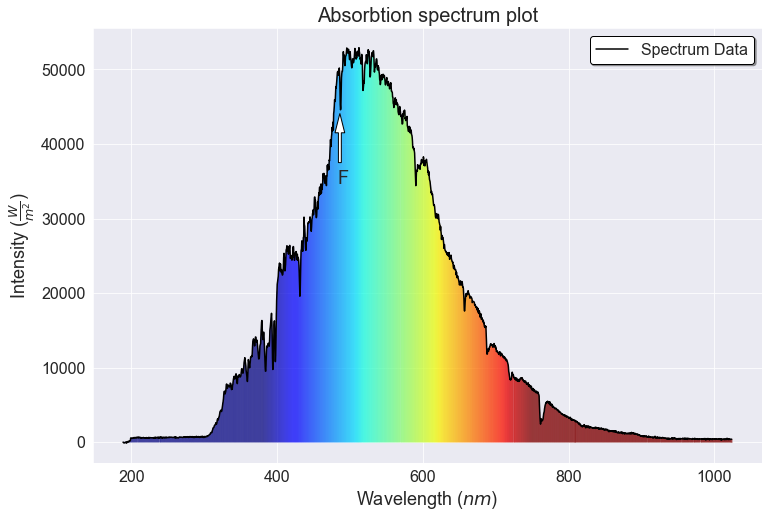

In [4]:
# Plot absorbtion sprectrum data


# Generate test data
df = pd.read_csv('../Cleaned_Data/absorbtion_spectrum_sunlight_data_cleaned.csv')


# Plot test data
fig, ax = make_ax(df, x='Wavelength', y='Intensity', title='Absorbtion spectrum plot',
                 figsize=(12,8), xlabel='Wavelength ($nm$)', ylabel=r'Intensity ($\frac{W}{m^2}$)',
                 label='Spectrum Data')


# Add spectrum
ax = add_sprectrum(ax, df['Wavelength'], df['Intensity'])


# Add arrow
ax = add_arrow(ax, 486, 43500, up=True, name='F', size=4000, fontsize=18)
'''ax = add_arrow(ax, 532, 185, up=True, name='Br', size=15, fontsize=15)
ax = add_arrow(ax, 562, 189, up=True, name='Ne', size=15, fontsize=15)
ax = add_arrow(ax, 632, 160, up=True, name='Au', size=15, fontsize=15)'''


# Plot figure
brigtness = 'dark' if dark else 'light'
plot_ax(ax, legend=True, grid=(not dark), save=True, filename=f'../../../Final_graphs/absorbtion_spectrum_plot_{brigtness}.pdf')